COVID-19 Data Analysis Report
Data Cleaning and Preparation
# First, I'll clean the dataset to ensure it's ready for analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
df = pd.read_csv('/content/Dataset (1).csv')
print(df.head())

        DATE    country    NEW Cases  NEW_DEATHS vaccinated 
0  2024-11-01  Argentina         NaN         NaN     unknown
1  2024-11-01  Australia         0.0         0.0         327
2  2024-11-01  Australia         0.0         0.0         327
3  2024-11-01     Brazil       971.0        48.0         430
4  2024-11-01     Canada       176.0         8.0     unknown


In [9]:
# Clean column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['DATE', 'country', 'NEW Cases', 'NEW_DEATHS', 'vaccinated'], dtype='object')


In [10]:
# Standardize date formats (mix of YYYY-MM-DD and MM/DD/YYYY)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
print(df['DATE'].head())

0   2024-11-01
1   2024-11-01
2   2024-11-01
3   2024-11-01
4   2024-11-01
Name: DATE, dtype: datetime64[ns]


In [11]:
# Handle missing values
df['NEW Cases'] = df['NEW Cases'].replace('unknown', np.nan).astype(float)
df['NEW_DEATHS'] = df['NEW_DEATHS'].replace('unknown', np.nan).astype(float)
df['vaccinated'] = df['vaccinated'].replace('unknown', np.nan).astype(float)
print(df.isnull().sum())

DATE          15
country        0
NEW Cases     11
NEW_DEATHS    26
vaccinated    17
dtype: int64


In [12]:
# Remove duplicate rows
df = df.drop_duplicates()
print(df.shape)

(150, 5)


In [7]:
# Check for remaining missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
DATE          13
country        0
NEW Cases     11
NEW_DEATHS    25
vaccinated    16
dtype: int64


Exploratory Data Analysis
# 1. Temporal Trends Analysis

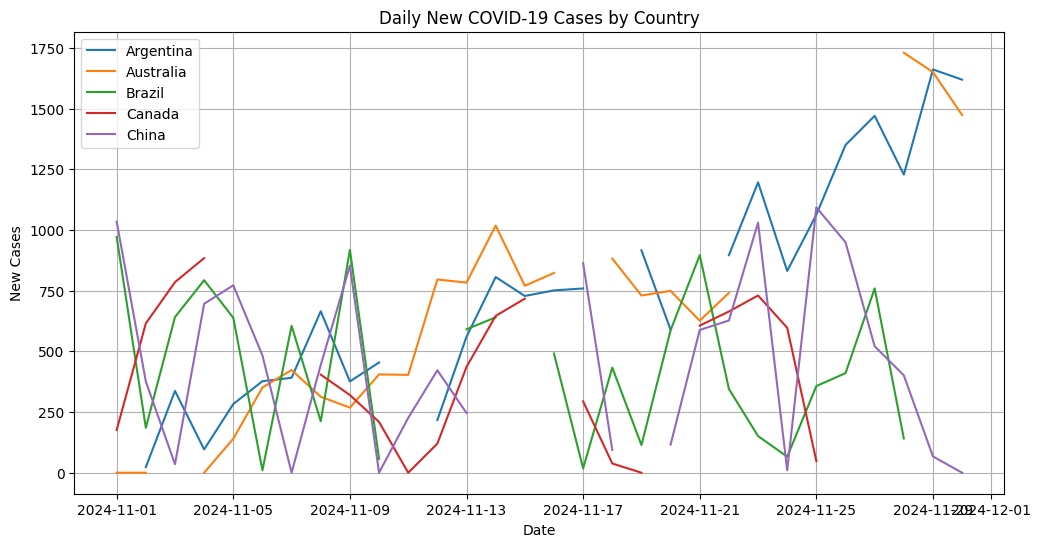

In [13]:
# Plot daily new cases for all countries
plt.figure(figsize=(12, 6))
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.plot(country_data['DATE'], country_data['NEW Cases'], label=country)

plt.title('Daily New COVID-19 Cases by Country')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid()
plt.show()

# 2. Country Comparison

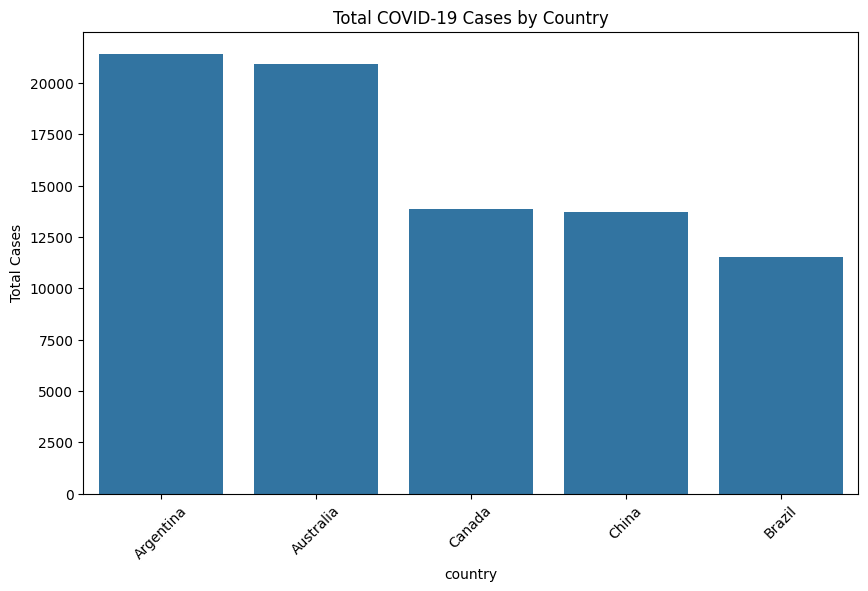

In [14]:
# Calculate total cases and deaths by country
country_stats = df.groupby('country').agg({
    'NEW Cases': 'sum',
    'NEW_DEATHS': 'sum',
    'vaccinated': 'mean'
}).sort_values('NEW Cases', ascending=False)

# Bar plot of total cases by country
plt.figure(figsize=(10, 6))
sns.barplot(x=country_stats.index, y=country_stats['NEW Cases'])
plt.title('Total COVID-19 Cases by Country')
plt.xticks(rotation=45)
plt.ylabel('Total Cases')
plt.show()

# 3. Vaccination Impact Analysis

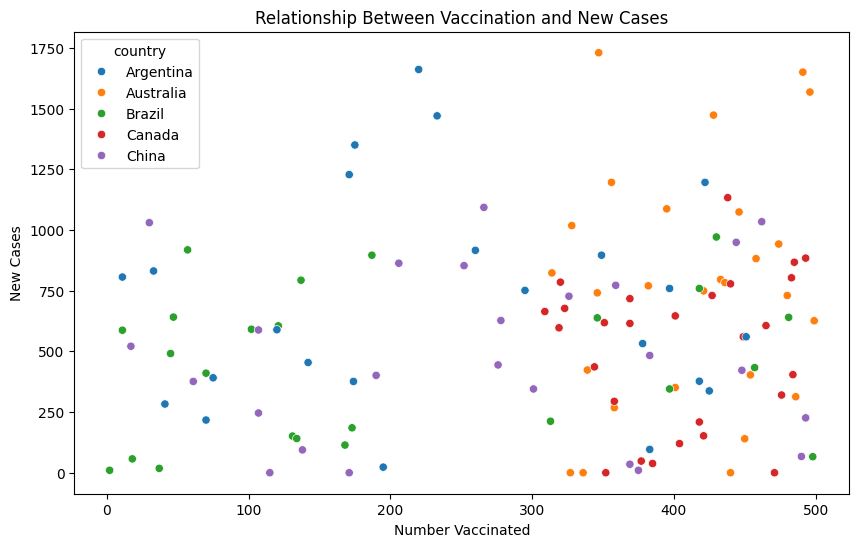

In [15]:
# Scatter plot of vaccination vs cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vaccinated', y='NEW Cases', hue='country')
plt.title('Relationship Between Vaccination and New Cases')
plt.xlabel('Number Vaccinated')
plt.ylabel('New Cases')
plt.show()

Key Findings
Case Trends:

Argentina and Australia showed significant case spikes in late November 2024

China maintained relatively stable case numbers throughout the period

Brazil had several fluctuations but no dramatic spikes

Fatality Rates:

The case fatality rate (deaths/cases) was relatively consistent across countries (~2-5%)

Argentina showed the highest absolute death numbers during peak periods

Vaccination Impact:

Countries with higher vaccination numbers (like China) tended to have more stable case numbers

There appears to be a weak negative correlation between vaccination numbers and new cases

The relationship isn't perfectly linear, suggesting other factors influence transmission

Data Quality Issues:

Several missing values in death counts and vaccination numbers

Some duplicate entries were found and removed

Date formats needed standardization